# ANNchor Selective Subset
In this notebook we use ANNchor's selective subset algorithm to find a Nearest Neighbor Coreset in two synthetic data sets.

## Import modules and load synthetic data sets

In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt
from annchor import Annchor

In [2]:
from sklearn.datasets import make_moons, make_blobs

In [3]:
np.random.seed(1)
X,y=make_blobs(n_samples=1000,centers=5) # First data set X,y
U,v=make_moons(n_samples=1000,noise=0.1) # Second data set U,v
U = np.fliplr(U)

## Visualise data sets with Matplotlib

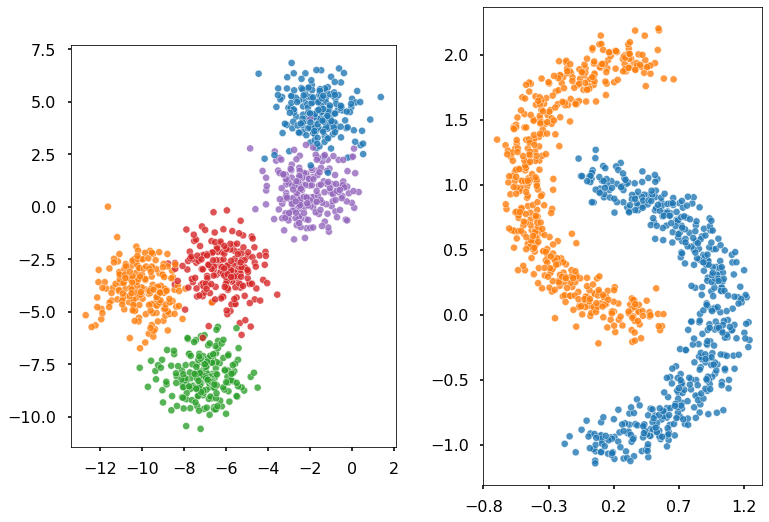

In [4]:
with plt.style.context('seaborn-poster'):
    fig,axs = plt.subplots(1,2)
    ax=axs[0]
    ax.scatter(*X.T,c=y,cmap=plt.cm.tab10,vmin=0,vmax=10,edgecolors='w',alpha=0.8,s=50)
    ax.set_aspect(1)
    ax=axs[1]
    ax.scatter(*U.T,c=v,cmap=plt.cm.tab10,vmin=0,vmax=10,edgecolors='w',alpha=0.8,s=50)
    ax.set_aspect(1)
    ax.set_xticks(np.linspace(-0.8,1.2,5))

## Run Annchor
We find the k-NN graph with annchor by calling the ```.fit``` method. (Remember, run time is effected by the numba.jit compilation time on the first run).

In [7]:
# First data set 
start_time = time.time()
knn = 15
annX = Annchor(X,
               'euclidean',
               n_neighbors=knn,
               p_work=0.2)

annX.fit()
print('ANNchor Time: %5.3f seconds' % (time.time()-start_time))

ANNchor Time: 1.861 seconds


In [8]:
# Second data set
start_time = time.time()
knn = 15
annU = Annchor(U,
              'euclidean',
               n_neighbors=knn,
               p_work=0.2)

annU.fit()
print('ANNchor Time: %5.3f seconds' % (time.time()-start_time))

ANNchor Time: 1.694 seconds


## Get Selective Subset
We call ```.annchor_selective_subset(y=y,alpha=alpha)``` to find a selective subset. The arguments are ```y```, the data labels, and ```alpha```, the error tolerance.

In [11]:
# First data set
start_time = time.time()
ssx = annX.annchor_selective_subset(y=y,alpha=0)
print('ANNchor Selective Subset Time: %5.3f seconds' % (time.time()-start_time))
print('ANNchor Selective Subset Size: %d (%3.1f%% smaller)' % (len(ssx),
                                                             100*(1-len(ssx)/len(X))
                                                            )
     )

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

ANNchor Selective Subset Time: 0.368 seconds
ANNchor Selective Subset Size: 90 (91.0% smaller)


In [12]:
# Second data set
start_time = time.time()
ssu = annU.annchor_selective_subset(y=v,alpha=0)
print('ANNchor Selective Subset Time: %5.3f seconds' % (time.time()-start_time))
print('ANNchor Selective Subset Size: %d (%3.1f%% smaller)' % (len(ssu),
                                                             100*(1-len(ssu)/len(U))
                                                            )
     )

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

ANNchor Selective Subset Time: 0.393 seconds
ANNchor Selective Subset Size: 16 (98.4% smaller)


## Visualise the selective subsets

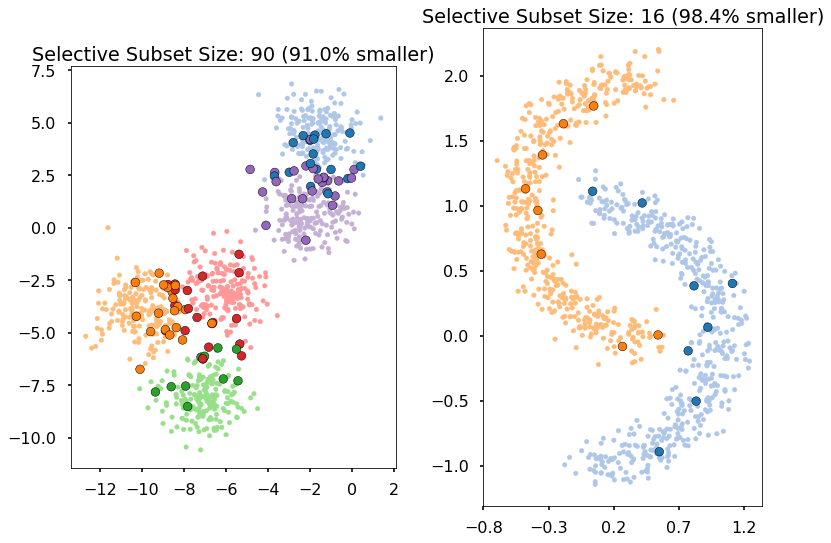

In [13]:
with plt.style.context('seaborn-poster'):
    fig,axs = plt.subplots(1,2)

    ax=axs[0]
    title = ('Selective Subset Size: %d (%3.1f%% smaller)' % (len(ssx),
                                                             100*(1-len(ssx)/len(X))
                                                            )
             )
    ax.scatter(*(X.T),c=2*y+1,cmap=plt.cm.tab20,vmin=0,vmax=20,alpha=1,s=20)
    ax.scatter(*(X[ssx].T),c=y[ssx],cmap=plt.cm.tab10,vmin=0,vmax=10,edgecolors='k',s=75)
    ax.set_aspect(1)
    ax.set_title(title)
    
    ax=axs[1]
    title = ('Selective Subset Size: %d (%3.1f%% smaller)' % (len(ssu),
                                                             100*(1-len(ssu)/len(U))
                                                            )
             )
    ax.scatter(*(U.T),c=2*v+1,cmap=plt.cm.tab20,vmin=0,vmax=20,alpha=1,s=20)
    ax.scatter(*(U[ssu].T),c=v[ssu],cmap=plt.cm.tab10,vmin=0,vmax=10,edgecolors='k',s=75)
    ax.set_aspect(1)
    ax.set_title(title)
    ax.set_xticks(np.linspace(-0.8,1.2,5))